# Lab 07: Neural Network with Backpropagation
Bài tập này tương tự với Lab 03 Linear Regression, cơ bản chỉ khác thay vì dùng hàm linear, ta dùng một model neural network.

### 1.1 Data

Data dùng trong bài thực hành này gồm chiều dài dọc gân lá ($x_1$) và chiều ngang gân lá ($x_2$) và loại lá ($y$, có giá trị 0 hoặc 1).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("bt_train.csv")
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


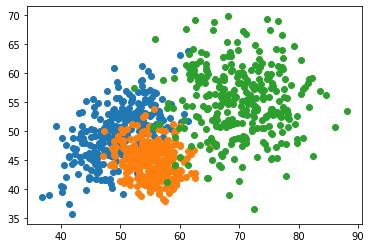

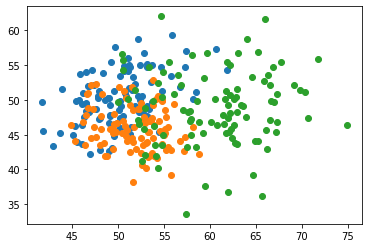

In [2]:

x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2])

plt.figure()
valid = pd.read_csv("bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1])
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2])

## normalization
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

### 1.2 Multi-class classification
Ta muốn dựa vào 2 chiều của lá, phân biệt giữa loại lá 1 và loại lá 2. Cụ thể, với $x = (x_1,x_2, 1)$ là input, ta muốn đoán một phân phối
$$ P_\theta(c|x),c = 0, 1 $$
với $\theta$ là các tham số.

Ta mô hình $P_\theta$ là một neural network có 2 lớp ẩn, mỗi lớp 5 neurons, tức là
$$ P_\theta(c|x) = \text{softmax}(\max(0, \max(0, x \cdot W_1 + b_1) \cdot W_2 + b_2) \cdot W_3 + b_3 )$$
với $x$ là vector dòng $[[x_1, x_2]]$ kích thước $ 1\times 2$, $W_1, W_2, W_3$ là các ma trận có kích thước $2 \times 5, 5 \times 5, 5 \times 3$, và $b_1, b_2, b_3$ là các ma trận kích thước $1 \times 5, 1 \times 5, 1 \times 3$. 

Khi đó $P(c|x)$ là một vector dòng độ dài 3, xem như  $P(c|x)= (P_1(c|x), P_2(c|x), P_3(c|x)) = (P(c=0|x), P(c=1|x), P(c=2|x))$

Bộ bác ma trận $\theta = (W_1, W_2, W_3, b_1, b_2, b_3)$ chính là tham số cần tìm của model. Giờ cần tìm $\theta$ sao cho 
$$ L = \frac{1}{N} \sum_{x,y} - y_0 \log P_\theta(0|x) -  y_1 \log P_\theta(1|x) - y_2 \log P_\theta(2|x) $$
đạt giá trị nhỏ nhất với $y = (y_0, y_1, y_2)$ là one-hot vector biểu thị loại lá tương ứng với $x$.



## Bài tập
- (33% điểm) Dùng sklearn train model neural network với tối thiểu 2 layer ẩn để đạt accuracy tốt nhất trên tập valid
- (100% điểm) Cài đặt lại backpropagation bằng numpy để tự học các ma trận $\theta$, huấn luyện đạt accuracy tốt nhất.

Điểm Lab này có giá trị bằng 2 Lab thường, được làm trong 2 tuần.

## Nộp bài
- Bài tập Lab 07 sẽ có 2 tuần để làm.
- Code và chạy kết quả lưu vào file notebook NMMH_TH7_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH7_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 21/07/2020. Nộp trễ bị chia đôi số điểm.

Dùng sklearn train model neural network với tối thiểu 2 layer ẩn để đạt accuracy tốt nhất trên tập valid

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
df_train = pd.read_csv('./bt_train.csv')
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,900.0,58.256150,9.838619,36.835697,51.207617,55.582897,65.772671,88.072368
x2,900.0,49.923791,6.261130,35.759690,45.293391,48.863440,53.870140,69.823519
label,900.0,1.000000,0.816951,0.000000,0.000000,1.000000,2.000000,2.000000


In [3]:
df_valid = pd.read_csv('./bt_valid.csv')
df_valid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,300.0,54.160850,6.235310,41.712759,49.797037,52.990272,57.563142,74.885479
x2,300.0,48.371201,4.542017,33.611923,45.253143,48.192719,51.234344,62.036312
label,300.0,1.000000,0.817861,0.000000,0.000000,1.000000,2.000000,2.000000


In [4]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train.label
X_train.shape, y_train.shape

((900, 2), (900,))

In [9]:
X_test = df_valid.drop(['label'], axis=1)
y_test = df_valid.label
X_test.shape, y_test.shape

((300, 2), (300,))

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam',  max_iter=4000, random_state=1)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[250  43   7]
 [ 38 260   2]
 [  5  10 285]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       300
           1       0.83      0.87      0.85       300
           2       0.97      0.95      0.96       300

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



In [27]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[86 12  2]
 [42 58  0]
 [16 37 47]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.70       100
           1       0.54      0.58      0.56       100
           2       0.96      0.47      0.63       100

    accuracy                           0.64       300
   macro avg       0.70      0.64      0.63       300
weighted avg       0.70      0.64      0.63       300

